In [7]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
keras.__version__

'2.2.4'

## Preprocessing

In [69]:
class1 = 'nosymptoms'
class2 = 'symptoms'
baseDir = './dataset'

#Training
subDir = 'train'
trainDir = os.path.join(baseDir, subDir)
trainNoSymptomsDir = os.path.join(baseDir, subDir, class1)
trainSymptomsDir = os.path.join(baseDir, subDir, class2)

#Validation
subDir = 'validation'
valDir = os.path.join(baseDir, subDir)
valNoSymptomsDir = os.path.join(baseDir, subDir, class1)
valSymptomsDir = os.path.join(baseDir, subDir, class2)

#Test
subDir = 'test'
testDir = os.path.join(baseDir, subDir)
testNoSymptomsDir = os.path.join(baseDir, subDir, class1)
testSymptomsDir = os.path.join(baseDir, subDir, class2)


In [70]:
from keras.preprocessing.image import ImageDataGenerator
import random

imageSize = 299
batchSize = 18
seed = random.randint(0,200)

trainDatagen = ImageDataGenerator(rescale=1./255)
valDatagen = ImageDataGenerator(rescale=1./255)
testDatagen = ImageDataGenerator(rescale=1./255)


trainGenerator = trainDatagen.flow_from_directory(
    trainDir,
    target_size=(imageSize,imageSize),
    batch_size=batchSize,
    class_mode='binary',
    seed=seed
)

valGenerator = valDatagen.flow_from_directory(
    valDir,
    target_size=(imageSize,imageSize),
    batch_size=batchSize,
    class_mode='binary',
    seed=seed,
    #save_to_dir='./altered', save_prefix='image'
)

testGenerator = testDatagen.flow_from_directory(
    testDir,
    target_size=(imageSize,imageSize),
    batch_size=batchSize,
    class_mode='binary',
    seed=seed
)

Found 1484 images belonging to 2 classes.
Found 372 images belonging to 2 classes.
Found 207 images belonging to 2 classes.


In [71]:
i = 0
for dataBatch, labelsBatch in trainGenerator:
    print('data batch shape:', dataBatch.shape)
    print('labels batch shape:', labelsBatch.shape)
    i = i + 1
    if i > 2:
        break

data batch shape: (18, 299, 299, 3)
labels batch shape: (18,)
data batch shape: (18, 299, 299, 3)
labels batch shape: (18,)
data batch shape: (18, 299, 299, 3)
labels batch shape: (18,)


In [72]:
labelsBatch

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.], dtype=float32)

In [73]:
from keras import layers
from keras import models
from keras.applications.inception_v3 import InceptionV3

#pre trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
pred = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=base_model.input, outputs=pred)

for layer in base_model.layers:
    layer.trainable = False

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_421 (Conv2D)             (None, None, None, 3 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_421 (BatchN (None, None, None, 3 96          conv2d_421[0][0]                 
__________________________________________________________________________________________________
activation_420 (Activation)     (None, None, None, 3 0           batch_normalization_421[0][0]    
__________________________________________________________________________________________________
conv2d_422

In [74]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['acc'])

In [75]:
from math import ceil
epochs = 5
trainSteps = ceil(trainGenerator.n/epochs/batchSize/2)
valSteps = ceil(valGenerator.n/epochs/batchSize/2)

results = model.fit_generator(
    trainGenerator,
    steps_per_epoch=trainSteps,
    verbose=1,
    epochs=epochs,
    validation_data= valGenerator,
    validation_steps=valSteps
)

#save model
model.save('case2run1.h5')

Epoch 1/5
9/9 [==============================] - 26s 3s/step - loss: 0.7615 - acc: 0.5926 - val_loss: 0.6004 - val_acc: 0.7037
Epoch 2/5
9/9 [==============================] - 20s 2s/step - loss: 0.6056 - acc: 0.6852 - val_loss: 0.5886 - val_acc: 0.7222
Epoch 3/5
9/9 [==============================] - 21s 2s/step - loss: 0.6279 - acc: 0.7160 - val_loss: 0.7022 - val_acc: 0.6111
Epoch 4/5
9/9 [==============================] - 21s 2s/step - loss: 0.6428 - acc: 0.6358 - val_loss: 0.5911 - val_acc: 0.7222
Epoch 5/5
9/9 [==============================] - 19s 2s/step - loss: 0.5617 - acc: 0.7469 - val_loss: 0.5963 - val_acc: 0.7037


In [76]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

0 input_6
1 conv2d_421
2 batch_normalization_421
3 activation_420
4 conv2d_422
5 batch_normalization_422
6 activation_421
7 conv2d_423
8 batch_normalization_423
9 activation_422
10 max_pooling2d_20
11 conv2d_424
12 batch_normalization_424
13 activation_423
14 conv2d_425
15 batch_normalization_425
16 activation_424
17 max_pooling2d_21
18 conv2d_429
19 batch_normalization_429
20 activation_428
21 conv2d_427
22 conv2d_430
23 batch_normalization_427
24 batch_normalization_430
25 activation_426
26 activation_429
27 average_pooling2d_41
28 conv2d_426
29 conv2d_428
30 conv2d_431
31 conv2d_432
32 batch_normalization_426
33 batch_normalization_428
34 batch_normalization_431
35 batch_normalization_432
36 activation_425
37 activation_427
38 activation_430
39 activation_431
40 mixed0
41 conv2d_436
42 batch_normalization_436
43 activation_435
44 conv2d_434
45 conv2d_437
46 batch_normalization_434
47 batch_normalization_437
48 activation_433
49 activation_436
50 average_pooling2d_42
51 conv2d_433
52

In [77]:
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True


In [78]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['acc'])

In [79]:
results2 = model.fit_generator(
    trainGenerator,
    steps_per_epoch=trainSteps,
    verbose=1,
    epochs=epochs,
    validation_data= valGenerator,
    validation_steps=valSteps
)

#save model
model.save('case2run2.h5')

Epoch 1/10
9/9 [==============================] - 27s 3s/step - loss: 0.5349 - acc: 0.7160 - val_loss: 3.0785 - val_acc: 0.7222
Epoch 2/10
9/9 [==============================] - 19s 2s/step - loss: 0.5520 - acc: 0.6852 - val_loss: 0.7235 - val_acc: 0.7037
Epoch 3/10
9/9 [==============================] - 20s 2s/step - loss: 0.5479 - acc: 0.6667 - val_loss: 2.9907 - val_acc: 0.7778
Epoch 4/10
9/9 [==============================] - 20s 2s/step - loss: 0.5190 - acc: 0.7686 - val_loss: 1.3726 - val_acc: 0.7222
Epoch 5/10
9/9 [==============================] - 21s 2s/step - loss: 0.4354 - acc: 0.8025 - val_loss: 2.3302 - val_acc: 0.7037
Epoch 6/10
9/9 [==============================] - 21s 2s/step - loss: 0.5225 - acc: 0.7593 - val_loss: 1.0093 - val_acc: 0.6250
Epoch 7/10
9/9 [==============================] - 21s 2s/step - loss: 0.4909 - acc: 0.8025 - val_loss: 0.6963 - val_acc: 0.6852
Epoch 8/10
9/9 [==============================] - 24s 3s/step - loss: 0.4771 - acc: 0.7531 - val_loss: 0

## Results

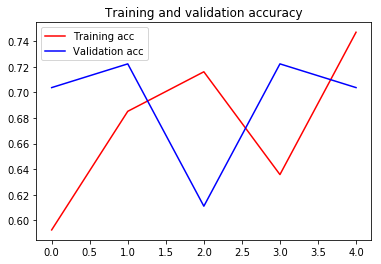

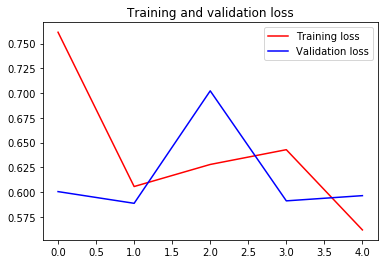

In [80]:
acc = results.history['acc']
val_acc = results.history['val_acc']
loss = results.history['loss']
val_loss = results.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [81]:
testLoss, testAcc = model.evaluate_generator(testGenerator, steps=testGenerator.n/batchSize, verbose=1)
testLoss, testAcc

12/11 [===============================] - 29s 2s/step


(0.9746262768040532, 0.7101449318554091)

In [82]:
testGenerator.reset()
predProb = model.predict_generator(testGenerator,
                                   steps=testGenerator.n/batchSize,
                                   verbose=1)

12/11 [===============================] - 26s 2s/step


In [83]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sb

predictions = np.argmax(predProb, axis=1)
cm = confusion_matrix(testGenerator.classes, predictions)

dfCm = pd.DataFrame(cm.T,
                    index=['Negatives','Positives'],
                    columns=['True', 'False'])

TP = dfCm.loc['Positives']['True']
TN = dfCm.loc['Negatives']['True']
FP = dfCm.loc['Positives']['False']
FN = dfCm.loc['Negatives']['False']

print('Sensitivity: ', TP/TP+FN)
print('Specificity: ', TN/TN+FP)

Sensitivity:  nan
Specificity:  1.0


C:\Users\Markus\Anaconda3\envs\py36g\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in longlong_scalars


In [84]:
print('Confusion matrix:\n', dfCm)

Confusion matrix:
            True  False
Negatives   147     60
Positives     0      0


In [85]:
print('Normalized confusion matrix:\n',dfCm/len(predictions))

Normalized confusion matrix:
                True     False
Negatives  0.710145  0.289855
Positives  0.000000  0.000000
